# Evolutionary Computation - Assignment 1 Report

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956

## Imports

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib import MatplotlibDeprecationWarning
import warnings

## Problem instance reading and cost scaling

In [37]:
dfTSPA = pd.read_csv('.\\TSPA.csv', sep=';', names=['X', 'Y', 'Cost'])
dfTSPB = pd.read_csv('.\\TSPB.csv', sep=';', names=['X', 'Y', 'Cost'])

min_cost_A = dfTSPA['Cost'].min()
max_cost_A = dfTSPA['Cost'].max()
dfTSPA['Normalized_Cost'] = (dfTSPA['Cost'] - min_cost_A) / (max_cost_A - min_cost_A)

min_cost_B = dfTSPB['Cost'].min()
max_cost_B = dfTSPB['Cost'].max()
dfTSPB['Normalized_Cost'] = (dfTSPB['Cost'] - min_cost_B) / (max_cost_B - min_cost_B)

## Problem description

### Problem

We were to find a cycle that consisted of exactly 50% of the available nodes, where each node had its own cost along with x and y coordinates. The objective function was a sum of node costs and distances (Euclidean) between each traveled node. 

### Solution implementation

We have implemented 4 methods to solve this problem. All of them were created in C++.

* **Random solution**

    * **Input:**
        - `distance_matrix`: A symmetric matrix of distances between nodes
        - `nodes_cost`: An array of nodes cost
        - `nodes_in_cycle`: An integer defining the desired number of nodes in the cycle

    * **Output:**
        - An array of `nodes_in_cycle` node IDs

    * **Function:**
        ```python
        func generateRandomCycle():  
            n = length(nodes_cost)  
            cycle = [ add i for i from 0 to n-1 ]  
            cycle = randomly_shuffle_array(cycle)  
            return first nodes_in_cycle elements from cycle  
* **Nearest Neighbour on Last Node**
    
    * **Input:** 
        - `starting_node_id` - ID of the first node added to the cycle
        - `distance_matrix` - A symmetric matrix of distances between nodes
        - `nodes_cost` - An array of nodes cost
        - `nodes_in_cycle` - An integer defining the desired number of nodes in the cycle

    * **Output:**
        - An array of `nodes_in_cycle` nodes IDs

    * **Function:**
        ```python
        func generateNNLastCycle():
            n = length(nodes_cost)
            cycle = []
            node_visited = [ add false for i from 0 to n-1 ]
            current_node_id = starting_node_id
            cycle[0] = current_node_id
            node_visited[current_node_id] = true
            for i from 1 to nodes_in_cycle:
                best_increase_in_function = maximum_value_of_int_variable()
                best_node_to_add = None
                for j from 0 to n - 1:
                    if not node_visited[j]:
                        current_node_increase = distance_matrix[current_node_id][j] + nodes_cost[j]
                        if current_node_increase < best_increase_in_function:
                            best_increase_in_function = current_node_increase
                            best_node_to_add = j
                if best_node_to_add is set:
                    node_visited[best_node_to_add] = true
                    cycle[i] = best_node_to_add
                    current_node_id = best_node_to_add
            return cycle

* **Nearest Neighbour on All Nodes**
		
    * **Input:**
        - `starting_node_id` - ID of the first node added to the cycle
        - `distance_matrix` - A symmetric matrix of distances between nodes
        - `nodes_cost` - An array of nodes cost
        - `nodes_in_cycle` - An integer defining the desired number of nodes in the cycle

    * **Output:**
        - An array of `nodes_in_cycle` nodes IDs

    * **Function:**
        ```python
        func generateNNAddAnywhereCycle():
            n = length(nodes_cost)
            cycle = []
            node_visited = [ add false for i from 0 to n-1 ]
            current_node_id = starting_node_id
            cycle[0] = current_node_id
            node_visited[current_node_id] = true
            for i from 1 to nodes_in_cycle:
                best_position_to_put_node = []
                best_increase_in_function_for_node = [ add maximum_value_of_int_variable() for i from 0 to n-1 ]
                for j from 0 to n-1: // Try adding node at the end
                    if not node_visited[j]:
                        current_increase_in_function = distance_matrix[last_element(cycle)][j] + nodes_cost[j]
                        best_increase_in_function_for_node[j] = current_increase_in_function
                        best_position_to_put_node[j] = length(cycle)
                for j from 0 to n-1: // Try adding node at the beginning
                    if not node_visited[j]:
                        current_increase_in_function = distance_matrix[first_element(cycle)][j] + nodes_cost[j]
                    if current_increase_in_function < best_increase_in_function_for_node[j]:
                        best_increase_in_function_for_node[j] = current_increase_in_function
                        best_position_to_put_node[j] = 0
                for j from 0 to n-1: // Try all other possibilities
                    if not visited[j]:
                        for position_in_cycle from 1 to length(cycle) - 1:
                            left_n = cycle[ position_in_cycle -1 ]
                            right_n = cycle[ position_in_cycle ]
                            current_increase_in_function = distance_matrix[j][left_n] + distance_matrix[j][right_n] + nodes_cost[j] - distance_matrix[left_n][right_n]
                                if current_increase_in_function < best_increase_in_function_for_node[j]:
                                    best_increase_in_function_for_node[j] = current_increase_in_function
                                    best_position_to_put_node[j] = position_in_cycle
                best_node_to_add = arg_min(best_increase_in_function)
                best_position = best_position_to_put_node[best_node_to_add]
                cycle.insert(value = best_node_to_add, at = best_position)
                node_visited[best_node_to_add] = true
            return cycle

* **Greedy Cycle**
    
    * **Input:**
        - `starting_node_id` - ID of the first node added to the cycle
        - `distance_matrix` - A symmetric matrix of distances between nodes
        - `nodes_cost` - An array of nodes cost
        - `nodes_in_cycle` - An integer defining the desired number of nodes in the cycle

    * **Output:**
        - An array of `nodes_in_cycle` nodes IDs

    * **Function:**
        ```python
        func generateGreedyCycle():
            n = length(nodes_cost)
            cycle = []
            node_visited = [ add false for i from 0 to n-1 ]
            current_node_id = starting_node_id
            cycle[0] = current_node_id
            node_visited[current_node_id] = true
            for i from 1 to nodes_in_cycle:
                best_position_to_put_node = []
                best_increase_in_function_for_node = [ add maximum_value_of_int_variable() for i from 0 to n-1 ]
                for j from 0 to n-1: // Try adding node at the beginning/end
                    if not node_visited[j]:
                        current_increase_in_function = distance_matrix[last_element(cycle)][j] + nodes_cost[j]
                        if length(cycle) > 1:
                            current_increase_in_function += distance_matrix[first_element(cycle)][j]
                        best_increase_in_function_for_node[j] = current_increase_in_function
                        best_position_to_put_node[j] = length(cycle)
                for j from 0 to n-1: // Try all other possibilities
                    if not visited[j]:
                        for position_in_cycle from 1 to length(cycle) - 1:
                            left_n = cycle[ position_in_cycle -1 ]
                            right_n = cycle[ position_in_cycle ]
                            current_increase_in_function = distance_matrix[j][left_n] + distance_matrix[j][right_n] + nodes_cost[j] - distance_matrix[left_n][right_n]
                                if current_increase_in_function < best_increase_in_function_for_node[j]:
                                    best_increase_in_function_for_node[j] = current_increase_in_function
                                    best_position_to_put_node[j] = position_in_cycle
                best_node_to_add = arg_min(best_increase_in_function)
                best_position = best_position_to_put_node[best_node_to_add]
                cycle.insert(value = best_node_to_add, at = best_position)
                node_visited[best_node_to_add] = true
            return cycle

## Presenting the results

### Results presented as minimum, average and maximum of objective function

Presented in a table below, each method and each problem instance is shown.

In [38]:
file_paths = ['.\\TSPAGreedy.csv', '.\\TSPANNAll.csv', '.\\TSPANNLast.csv', '.\\TSPARandom.csv', '.\\TSPBGreedy.csv', '.\\TSPBNNAll.csv', '.\\TSPBNNLast.csv', '.\\TSPBRandom.csv'] 
methods = ['TSPA Greedy Cycle', 'TSPA NN on all vertices', 'TSPA NN on last node', 'TSPA Random', 'TSPB Greedy Cycle', 'TSPB NN on all vertices', 'TSPB NN on last node', 'TSPB Random']
results = []
best_solutions = []

for file_path, method in zip(file_paths, methods):
    df = pd.read_csv(file_path)
    costs = df.iloc[:, -1]
    minimum = costs.min()
    maximum = costs.max()
    mean = round(costs.mean(), 2)
    results.append([minimum, mean, maximum])

    min_sol = df.loc[costs.idxmin()][:-1].to_list()
    best_solutions.append(min_sol)
    
result_df = pd.DataFrame(results, columns=['Minimum', 'Average', 'Maximum'], index=methods)
result_df

,Minimum,Average,Maximum
TSPA Greedy Cycle,71237,73036.23,75002
TSPA NN on all vertices,71227,73293.75,76036
TSPA NN on last node,83182,85110.16,89433
TSPA Random,236302,263481.34,293567
TSPB Greedy Cycle,48898,51852.88,58531
TSPB NN on all vertices,44377,47444.68,53019
TSPB NN on last node,52319,54385.49,59030
TSPB Random,188701,213568.36,239495


### Visualization of the best path for each method

Additionally, a list of node indices is presented.

TSPA Greedy Cycle
[117, 93, 140, 68, 46, 139, 193, 41, 115, 5, 42, 181, 159, 69, 108, 18, 22, 146, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 184, 43, 116, 65, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 180, 154, 53, 100, 26, 86, 75, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 57, 52, 185, 119, 40, 196, 81, 90, 165, 106, 178, 14, 144, 62, 9, 148, 102, 49, 55, 129, 120, 2, 101, 1, 97, 152, 124, 94, 63, 79, 80, 176, 137, 23, 186, 89, 183, 143, 0]


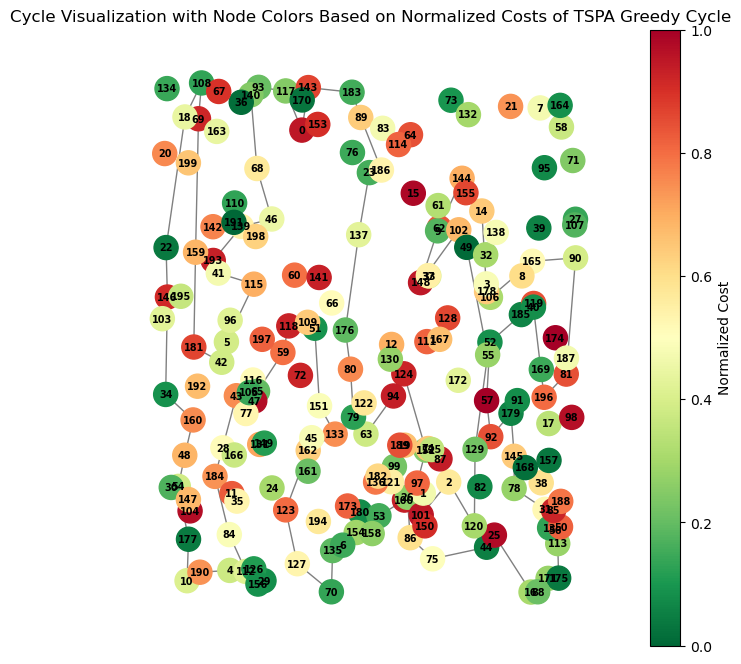

TSPA NN on all vertices
[93, 117, 0, 143, 183, 89, 186, 23, 137, 176, 80, 79, 63, 94, 124, 152, 97, 1, 101, 2, 120, 129, 55, 49, 102, 148, 9, 62, 144, 14, 178, 106, 165, 90, 81, 196, 40, 119, 185, 52, 57, 92, 179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 75, 86, 26, 100, 53, 154, 180, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 146, 22, 18, 108, 69, 159, 181, 42, 5, 193, 41, 139, 115, 46, 68]


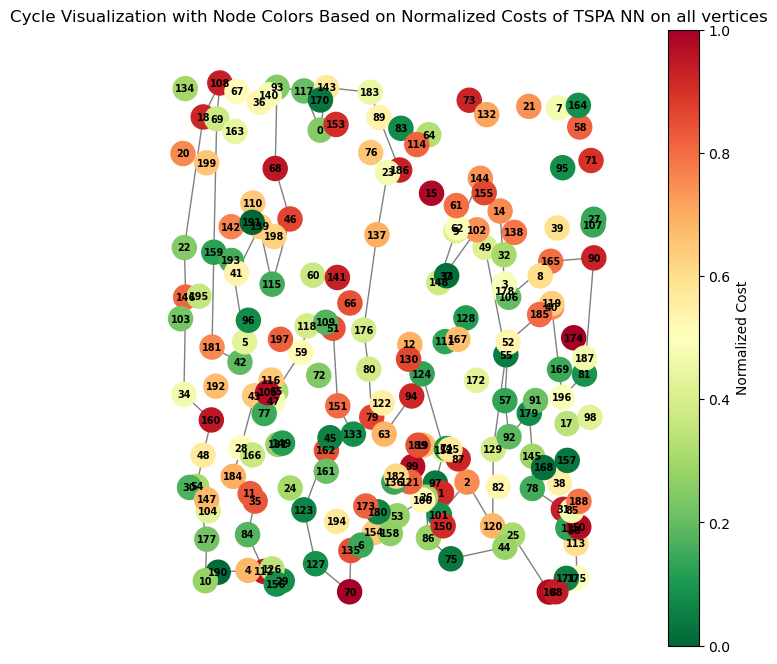

TSPA NN on last node
[124, 94, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 176, 80, 79, 133, 162, 51, 137, 183, 143, 0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 149, 131, 112, 4, 84, 35, 10, 190, 127, 70, 101, 97, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121]


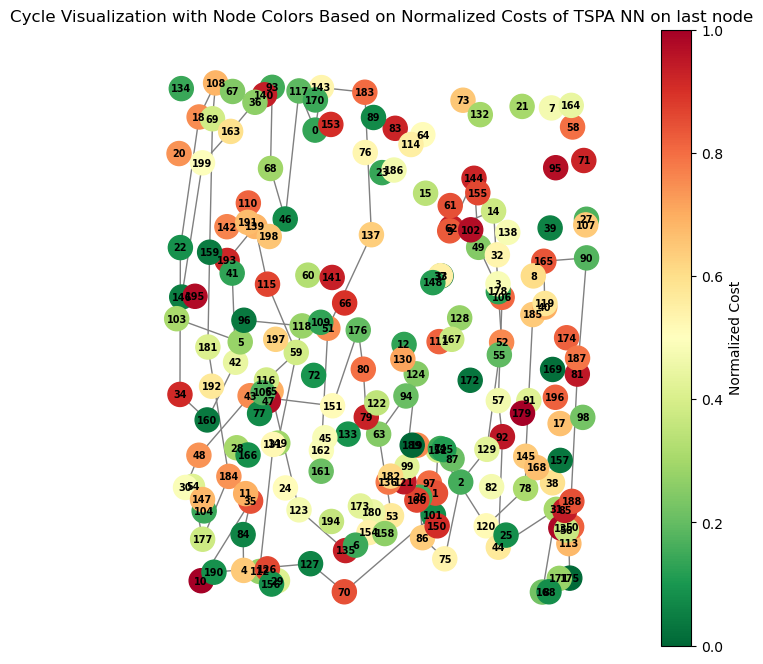

TSPA Random
[121, 145, 11, 115, 113, 120, 178, 117, 62, 77, 101, 15, 168, 89, 199, 183, 31, 98, 109, 66, 84, 108, 140, 48, 137, 194, 59, 47, 73, 93, 65, 50, 42, 119, 116, 135, 136, 189, 110, 80, 21, 139, 171, 19, 51, 173, 195, 55, 44, 150, 85, 97, 106, 196, 166, 43, 160, 190, 181, 114, 118, 54, 170, 57, 39, 53, 9, 123, 127, 128, 187, 63, 163, 141, 102, 144, 86, 156, 30, 151, 24, 133, 36, 126, 177, 159, 191, 176, 134, 35, 192, 184, 12, 92, 23, 158, 188, 10, 70, 95]


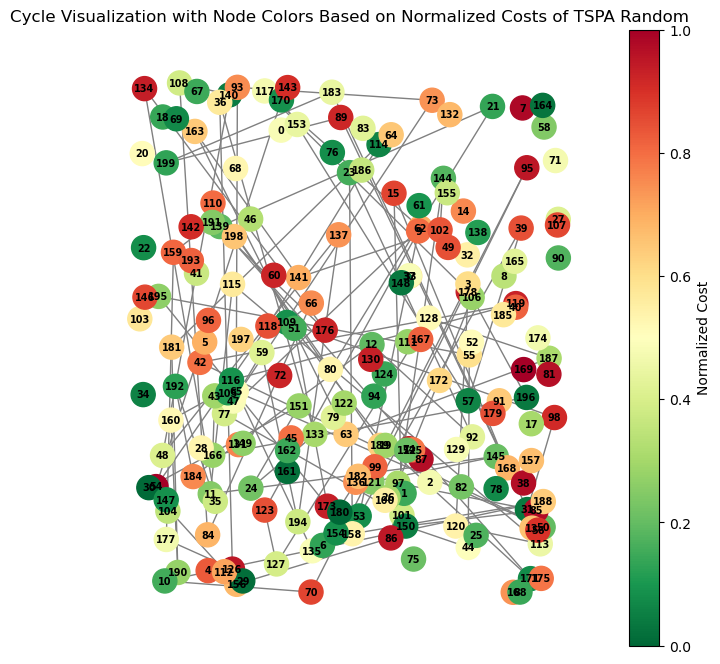

TSPB Greedy Cycle
[118, 74, 134, 139, 11, 182, 138, 33, 160, 144, 56, 104, 8, 21, 87, 82, 177, 5, 45, 142, 78, 175, 61, 36, 91, 141, 97, 77, 187, 165, 127, 89, 103, 137, 114, 113, 194, 166, 172, 179, 185, 99, 130, 22, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 143, 106, 128, 95, 86, 176, 180, 163, 153, 81, 111, 0, 35, 109, 29, 168, 195, 145, 15, 3, 70, 161, 13, 132, 169, 188, 6, 147, 191, 90, 10, 133, 122, 63, 135, 131, 121, 51]


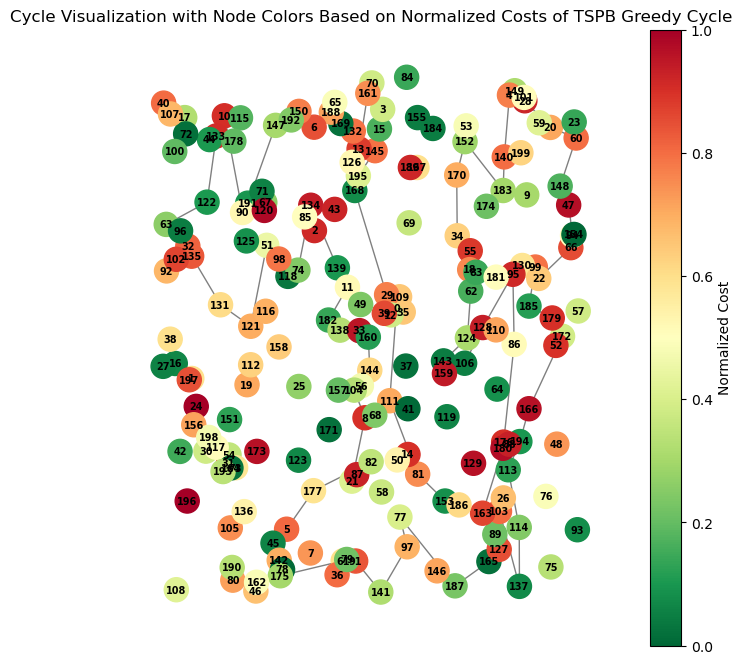

TSPB NN on all vertices
[147, 6, 188, 169, 132, 13, 70, 3, 15, 145, 195, 168, 139, 11, 182, 138, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 179, 185, 22, 99, 130, 95, 86, 166, 194, 176, 180, 113, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 36, 61, 21, 82, 111, 144, 8, 104, 177, 5, 45, 142, 78, 175, 162, 80, 190, 136, 73, 54, 31, 193, 117, 198, 156, 1, 16, 27, 38, 135, 63, 122, 90, 121]


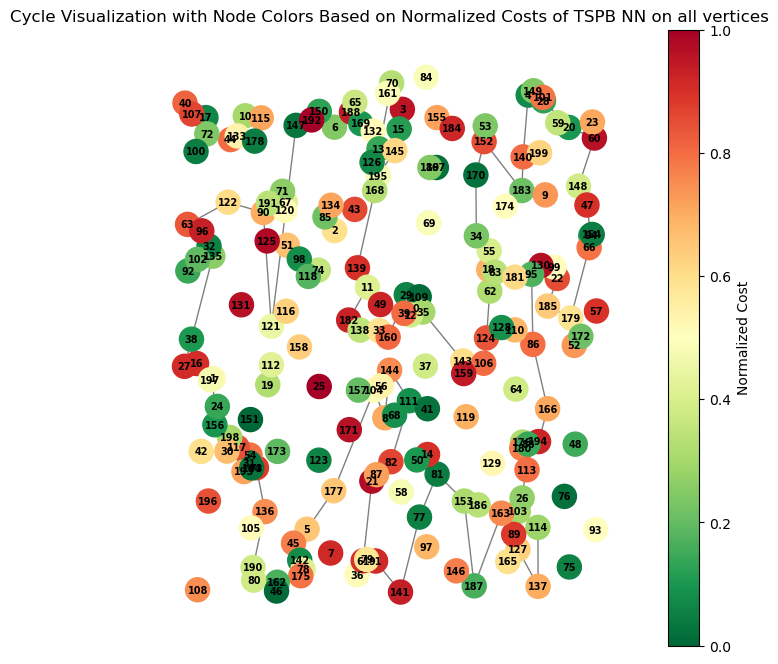

TSPB NN on last node
[16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74]


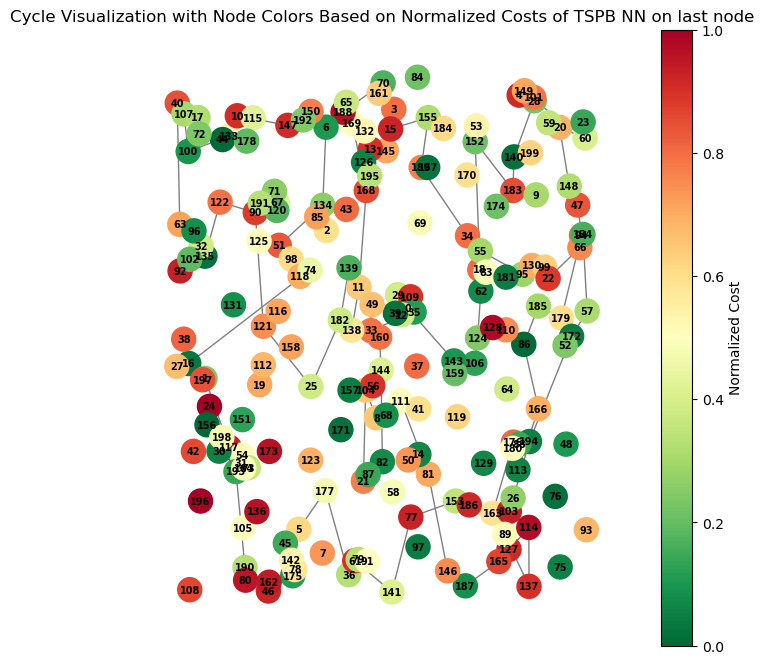

TSPB Random
[179, 109, 103, 134, 100, 79, 138, 131, 27, 92, 9, 74, 147, 29, 37, 68, 62, 15, 78, 127, 137, 160, 45, 125, 77, 13, 154, 113, 128, 190, 169, 64, 182, 183, 55, 148, 166, 165, 50, 5, 86, 194, 75, 170, 93, 163, 199, 121, 83, 126, 158, 149, 41, 187, 20, 144, 167, 99, 95, 67, 175, 52, 51, 0, 42, 177, 8, 4, 188, 49, 11, 80, 72, 85, 153, 198, 135, 16, 81, 61, 22, 195, 1, 123, 114, 119, 189, 192, 33, 63, 130, 69, 176, 162, 26, 110, 173, 54, 132, 66]


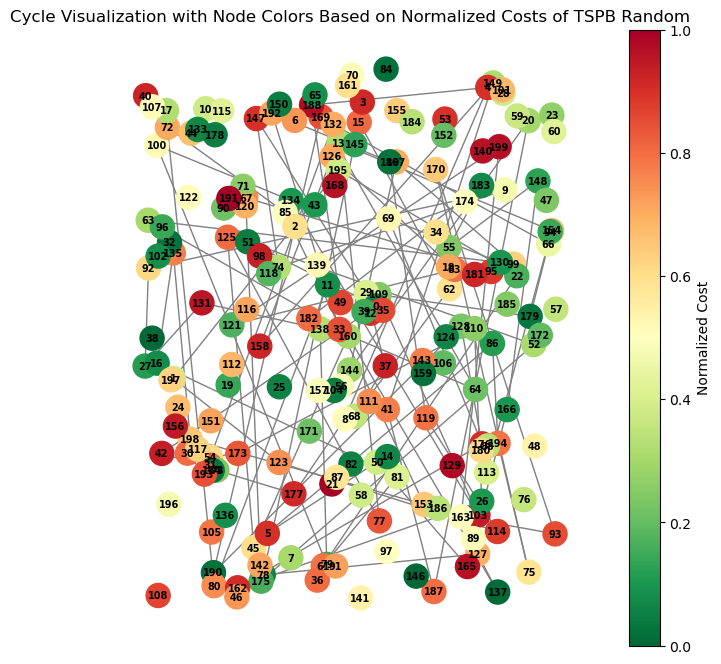

In [41]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
cmap = plt.cm.get_cmap('RdYlGn_r')

for count, method in enumerate(methods):
    print(method)
    print(best_solutions[count])

    G = nx.Graph()
    positions = {}

    if count < 4:
        for idx in best_solutions[count]:
            G.add_node(idx, size=dfTSPA.loc[idx, 'Normalized_Cost'])
            positions[idx] = (dfTSPA.loc[idx, 'X'], dfTSPA.loc[idx, 'Y'])

        for idx in [i for i in range(0,200) if i not in best_solutions[count]]:
            G.add_node(idx, size=dfTSPA.loc[idx, 'Normalized_Cost'])
            positions[idx] = (dfTSPA.loc[idx, 'X'], dfTSPA.loc[idx, 'Y'])

        for i in range(len(best_solutions[count]) - 1):
            G.add_edge(best_solutions[count][i], best_solutions[count][i + 1])
        G.add_edge(best_solutions[count][-1], best_solutions[count][0])


        normalized_costs = dfTSPA['Normalized_Cost']
        norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
        node_colors = [cmap(norm(dfTSPA.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]

    else:
        for idx in best_solutions[count]:
            G.add_node(idx, size=dfTSPB.loc[idx, 'Normalized_Cost'])
            positions[idx] = (dfTSPB.loc[idx, 'X'], dfTSPB.loc[idx, 'Y'])
        
        for idx in [i for i in range(0,200) if i not in best_solutions[count]]:
            G.add_node(idx, size=dfTSPB.loc[idx, 'Normalized_Cost'])
            positions[idx] = (dfTSPB.loc[idx, 'X'], dfTSPB.loc[idx, 'Y'])

        for i in range(len(best_solutions[count]) - 1):
            G.add_edge(best_solutions[count][i], best_solutions[count][i + 1])
        G.add_edge(best_solutions[count][-1], best_solutions[count][0])

        normalized_costs = dfTSPB['Normalized_Cost']
        norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
        node_colors = [cmap(norm(dfTSPB.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]

    fig, ax = plt.subplots(figsize=(8, 8))  # Explicitly define the axes
    nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=300, font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)

    # Create a ScalarMappable for the colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for colorbar

    # Add colorbar to the plot
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Normalized Cost')

    plt.title(f"Cycle Visualization with Node Colors Based on Normalized Costs of {method}")
    plt.show()

## Additional Information

### Solution checker

We have checked all of the best solutions via the solution checker provided.

### Source code link

The source code is available in a repository [here](https://github.com/Mickeyo0o/EvolutionaryComp/tree/main/Lab1) under the Lab1 folder.

## Conclusions

The algorithms implemented to address the Hamiltonian cycle problem exhibit a range of performance in terms of the objective function score.

* Random Selection: As anticipated, the solutions generated by random selection yielded the poorest results. This approach lacks a structured method for optimizing node selection, resulting in the worst cycles.

* Nearest Neighbour Variants: Among the variations of the Nearest Neighbour algorithm, the version restricted to adding only the nearest neighbor from the last added node performed worse than the more flexible variant. This limitation hinders the exploration of potentially better paths, leading to less favorable outcomes.

* Greedy Cycle Method: Surprisingly, the Greedy Cycle method, which aims to create a cycle by selecting the least costly edge iteratively, consistently performed slightly better than the restricted version of Nearest Neighbour algorithm and slightly worse than the unrestricted version.

While the results are satisfactory, it is evident that there is considerable room for improvement. More advanced algorithms can still provide far better results, than the methods implemented now.

In summary, while the current algorithms provide reasonable results, further refinement and the exploration of more sophisticated optimization techniques are necessary to achieve significantly better solutions for the Hamiltonian cycle problem.

## Authors

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956